In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts

In [2]:
kB = cts.k
kB

1.380649e-23

In [3]:
# Data file reading 

def collect_data (n, interaction): # n is the number of files

    Tdata = [];
    Pdata = []
    for i in range (0, n, 1):

        file = open ("data" + str (interaction) + "-" + str (i) + ".txt","r");
        raw_data = file.readlines();

        T = [];
        P = [];
        
        for line in raw_data:
            
            dat = line.split();

            if (len (dat) == 0):
                break;
                
            T.append (float (dat[0]));
            P.append (float (dat[1]));

        Tdata.append (T);
        Pdata.append (P);
        
        file.close ();
        

    return [Tdata, Pdata];

In [4]:
# Statistics 

def stats (arr):

    # Mean

    mu = 0;
    
    for i in range (29, len (arr), 1):
        mu = mu + arr[i];
        
    mu = mu / (len (arr)-29);

    sigma = 0;
    
    for i in range (29, len (arr), 1):
        sigma = sigma + pow (arr[i] - mu, 2);

    sigma = np.sqrt(sigma / (len (arr)-29));

    return [mu, sigma]

In [5]:
# Density array

V = pow (5, 3);

rho_arr = [50/V, 150 / V, 250 / V, 500 / V, 750 / V, 1000 / V];

In [6]:
# Data collection

n = 6;

a = 25; # Interaction term

Tdata, Pdata = collect_data (n, a);

In [7]:
# Average temperature array

mu_T = [];
sigma_T = [];

for i in Tdata:
    
    muTi, sigmaTi = stats (i);

    mu_T.append (muTi);
    sigma_T.append (sigmaTi);

print (mu_T)

[1.1450448527777786, 1.2305181972222226, 1.1694896083333328, 1.1479080263888894, 1.0715589208333334, 1.0403175774999998]


In [8]:
print (sigma_T)

[0.026116431390218544, 0.0198739664384855, 0.03349415151248113, 0.059404507140105846, 0.05337248598326291, 0.0572291202750314]


In [9]:
# Average pressure array

mu_P = [];
sigma_P = [];

for i in Pdata:
    
    muPi, sigmaPi = stats (i);

    mu_P.append (muPi);
    sigma_P.append (sigmaPi);
    
print (mu_P)

[0.058125327319444454, 0.20946883972222222, 0.36994311444444444, 0.9164027540277778, 1.6127175875, 2.611741609722222]


In [10]:
print (sigma_P)

[0.006181823352345802, 0.018872217552416908, 0.035583405426307724, 0.08202725123507812, 0.13956756043405102, 0.18470957593635348]


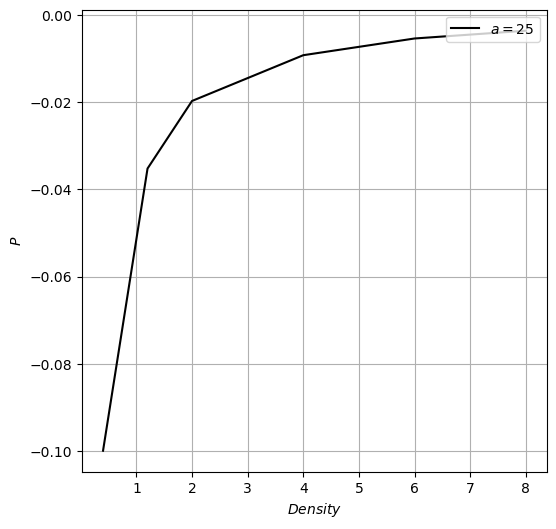

In [11]:
# Pressure plot 

plot_arr = [];

for i in range (0, len (mu_P), 1):

    plot_arr.append ((mu_P[i] - rho_arr[i]*mu_T[i]) / (a* pow (rho_arr[i],2)));

    
fig, ax = plt.subplots(1,1,figsize=[6,6]);
ax.set_xlabel("$ Density$");
ax.set_ylabel("$ P$");
ax.set_title("");
#ax.set_xlim([0, 4]);
#ax.set_ylim([-1, 2]);

#ax.errorbar (dt_arr25, mu25, xerr = 0, yerr = sigma25, color = "black", label = "a = 25");
#ax.errorbar (dt_arr, mu75, xerr = 0, yerr = sigma75, color = "darkgreen", label = "a = 75");
ax.plot (rho_arr, plot_arr, color = "black", label = "$a = 25$")
    
ax.grid();
ax.legend(loc = "upper right");
plt.show(fig);
